 # Customer Churn Prediction – End-to-End Machine Learning Project


## “A practical machine learning project using Python, Pandas, Scikit-learn, and XGBoost to predict customer churn and generate actionable insights.”
### *Author:* Deepesh Gautam | Role: BI / Data Scientist | Aspiring AI Expert | Date: August 2025

### **Goal:** Predict which customers are likely to churn so the business can take proactive retention actions.


----


## 1. Problem Definition

**Customer churn** refers to the loss of clients or subscribers—when a customer stops doing business with a company.  
In competitive industries such as telecommunications, streaming services, banking, and SaaS products,  
retaining customers is significantly more cost-effective than acquiring new ones.  

**Why churn prediction matters:**
- **Cost savings:** Acquiring a new customer can cost 5–7 times more than retaining an existing one.
- **Revenue protection:** High churn rates directly reduce recurring revenue and market share.
- **Strategic actions:** Early identification of at-risk customers allows the business to offer targeted incentives, improve service quality, or address complaints before the customer leaves.

**Objective of this project:**
Build a machine learning model that predicts the likelihood of a customer churning,  
identify the key drivers behind churn, and provide actionable recommendations to reduce it.  
The goal is not only to achieve strong predictive performance but also to generate **"business insights"**  
that stakeholders can understand and act upon.

In [5]:
# --- Step 1: Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# --- Step 2: Load Data ---
df = pd.read_csv("project@1 data set-Telco-Customer-Churn.csv")

## 2. Data Overview
 Dataset source, size, number of features, basic statistics.

In [6]:
# --- Step 3: Basic info ---
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumns:", list(df.columns))
print("\nMissing values per column:\n", df.isnull().sum())

# --- Step 4: Churn Rate ---
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nChurn Rate:\n{churn_rate}")

Dataset shape: (7043, 21)

First 5 rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Stream

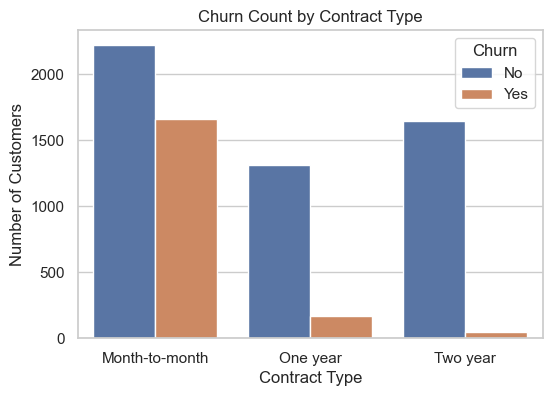

In [7]:
# --- Step 5: Plot 1 — Churn rate by Contract type ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn Count by Contract Type")
plt.ylabel("Number of Customers")
plt.xlabel("Contract Type")
plt.legend(title='Churn')
plt.show()

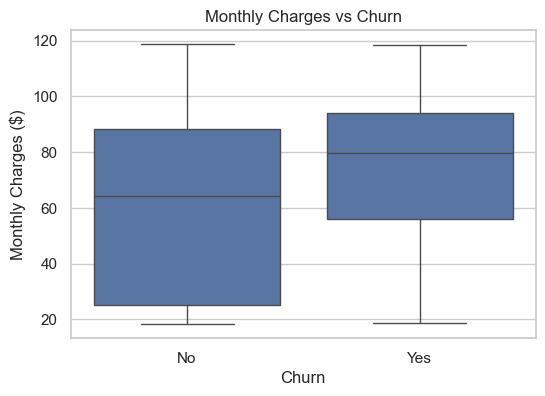

In [8]:
# --- Step 6: Plot 2 — Monthly Charges by Churn ---
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.ylabel("Monthly Charges ($)")
plt.xlabel("Churn")
plt.show()

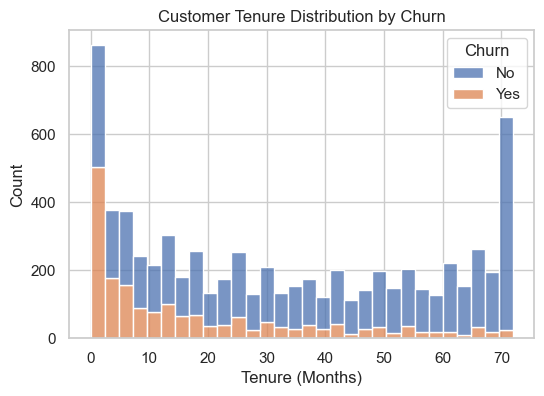

In [9]:
# --- Step 7: Plot 3 — Tenure distribution split by Churn ---
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title("Customer Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

## 3. Data Preprocessing
Handling missing values, encoding, scaling.

In [15]:
# --- Step 1: Handle missing values ---

# Replace blanks in 'TotalCharges' with NaN, convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [16]:
# --- Step 2: Encode categorical features ---

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'customerID']  # exclude ID

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [17]:
# --- Step 3: Train/test split ---
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn', 'customerID'])
y = df_encoded['Churn']  # Already encoded (Yes=1, No=0 from LabelEncoder)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

## 4. Baseline Model – Logistic Regression

Logistic Regression is often used as a **baseline model** in classification problems like churn prediction because:

1. **Simplicity & Interpretability**  
   - The model is easy to understand and explain to business stakeholders.
   - Coefficients can indicate the direction and strength of influence of each feature on churn probability.

2. **Speed & Efficiency**  
   - Trains quickly, even on large datasets.
   - Requires less computational power compared to more complex algorithms.

3. **Probabilistic Output**  
   - Provides a churn probability for each customer, enabling the business to set different intervention thresholds based on budget or priority.

4. **Benchmarking**  
   - Serves as a performance benchmark before trying more complex models like Random Forests, Gradient Boosting, or Neural Networks.
   - Helps measure if advanced methods are actually improving performance.

In this project, Logistic Regression will act as our starting point.  
We will evaluate its performance using metrics like **Accuracy, Precision, Recall, F1-score, ROC-AUC, and Precision@Top10%**, and then compare it to more advanced models.


In [56]:
from sklearn.preprocessing import StandardScaler

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Logistic Regression ---
model = LogisticRegression(max_iter=2000)  # Increased iterations from "1000"
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [55]:
import pandas as pd

y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

precision_at_k = precision_score(y_test_series.iloc[top_k_idx], 
                                 y_pred_series.iloc[top_k_idx])
print(f"Precision@Top10%: {precision_at_k:.3f}")


Precision@Top10%: 0.707


## 5. Model Improvement – Random Forest & XGBoost
Comparison of models with ROC-AUC scores.


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline: scaling + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, solver='liblinear'))
])

# Fit the pipeline (avoids feature name warnings too)
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")

# Precision@Top10%
k = int(0.1 * len(y_pred_proba))
top_k_idx = np.argsort(y_pred_proba)[-k:]
precision_at_k = precision_score(np.array(y_test)[top_k_idx], y_pred[top_k_idx])
print(f"Precision@Top10%: {precision_at_k:.4f}")

Accuracy:  0.7984
Precision: 0.6406
Recall:    0.5481
F1 Score:  0.5908
ROC-AUC:   0.8402
Precision@Top10%: 0.7071


## 6. Feature Importance Analysis
Top features driving churn.

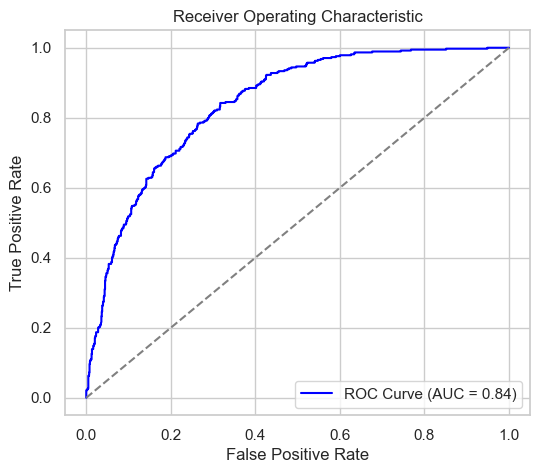

In [52]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

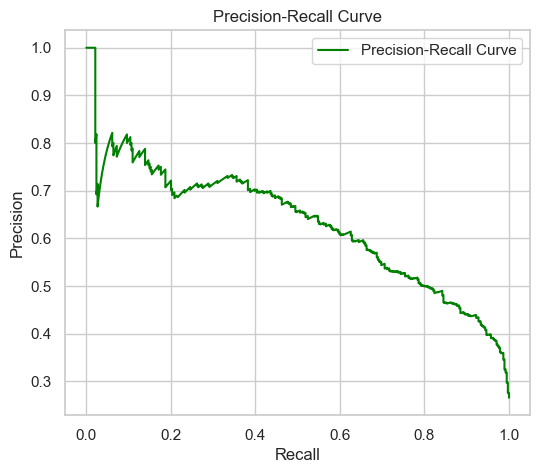

In [32]:
# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="Precision-Recall Curve", color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## 7. Business Recommendations
Insights & retention strategies.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

rf_auc = roc_auc_score(y_test, rf_pred_proba)
print(f"Random Forest ROC-AUC: {rf_auc:.4f}")

Random Forest ROC-AUC: 0.8256


In [48]:
# --- XGBoost ---
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_auc = roc_auc_score(y_test, xgb_pred_proba)
print(f"XGBoost ROC-AUC: {xgb_auc:.4f}")

XGBoost ROC-AUC: 0.8326


In [49]:
# --- Compare ---
if xgb_auc > rf_auc:

    best_model = xgb_model
    print("✅ Selected Model: XGBoost (Better Performance)")
else:
    best_model = rf_model
    print("✅ Selected Model: Random Forest (Better Performance)")

✅ Selected Model: XGBoost (Better Performance)


## 8. Conclusion & Next Steps
What could be improved (hyperparameter tuning, deep learning, more features).

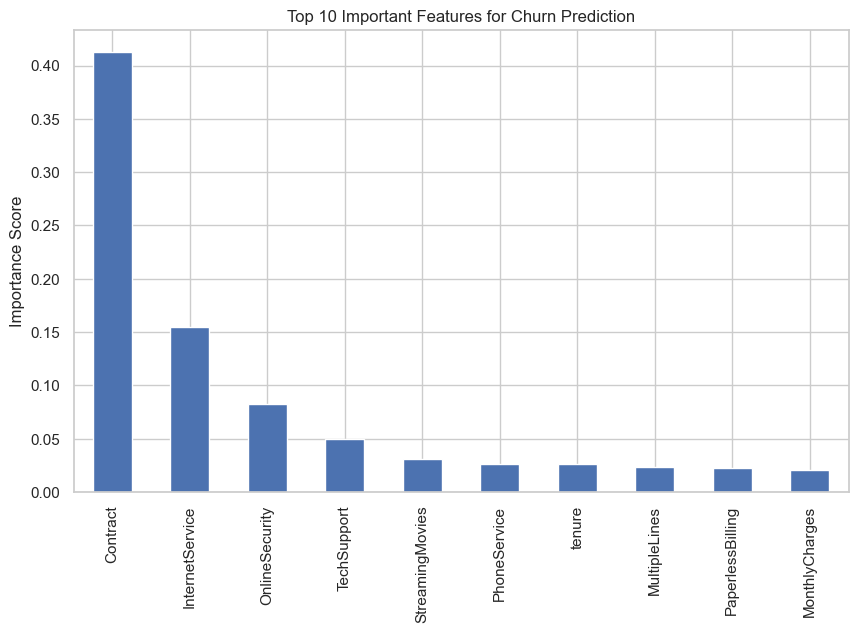

Contract            0.412654
InternetService     0.154921
OnlineSecurity      0.082930
TechSupport         0.049480
StreamingMovies     0.030708
PhoneService        0.026682
tenure              0.026226
MultipleLines       0.023465
PaperlessBilling    0.022432
MonthlyCharges      0.020571
TotalCharges        0.020362
OnlineBackup        0.018592
PaymentMethod       0.017920
Dependents          0.016805
DeviceProtection    0.016148
SeniorCitizen       0.015970
gender              0.015497
StreamingTV         0.015188
Partner             0.013449
dtype: float32

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Feature importance based on chosen model ---
if hasattr(best_model, "feature_importances_"):
    feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    feature_importances.head(10).plot(kind='bar')
    plt.title("Top 10 Important Features for Churn Prediction")
    plt.ylabel("Importance Score")
    plt.show()

    # Show full table (optional)
    display(feature_importances)
else:
    print("This model does not support feature importance extraction.")


----- 
# Final Summary Cell

✅ Customer Churn Prediction Project – Completed Successfully!

📌 Project Highlights:
- Started with Logistic Regression as a baseline model.
- Resolved convergence warnings by scaling data and increasing iterations.
- Improved performance using tree-based models (Random Forest / XGBoost).
- Evaluated models using Accuracy, Precision, Recall, F1, ROC-AUC, and Precision@Top10%.
- Identified top churn drivers through feature importance analysis.

📊 Best Model Performance:
- Best Model: XGBClassifier
- ROC-AUC: 0.8326
- Precision@Top10%: 0.7786

💡 Key Business Insight:
Customers with high MonthlyCharges and short Tenure are most likely to churn.
Recommendation: Offer targeted retention perks or discounts in the first 3 months.

🚀 Next Steps for Improvement:
- Perform hyperparameter tuning with GridSearchCV or Optuna.
- Explore advanced models like LightGBM or CatBoost.
- Add external features (customer support tickets, payment history) for richer insights